In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv('/content/car_price_prediction.csv')
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [4]:
df.shape


(19237, 18)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.describe()

,ID,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,4.557654e+07,1.855593e+04,2010.912824,4.582991,6.582627
std,9.365914e+05,1.905813e+05,5.668673,1.199933,4.320168
min,2.074688e+07,1.000000e+00,1939.000000,1.000000,0.000000
25%,4.569837e+07,5.331000e+03,2009.000000,4.000000,4.000000
50%,4.577231e+07,1.317200e+04,2012.000000,4.000000,6.000000
75%,4.580204e+07,2.207500e+04,2015.000000,4.000000,12.000000
max,4.581665e+07,2.630750e+07,2020.000000,16.000000,16.000000


In [7]:
df.replace(to_replace='-',value=np.nan,inplace=True)

In [8]:
df.isnull().sum().sort_values(ascending=False).head(6)

,0
Levy,5819
ID,0
Price,0
Manufacturer,0
Model,0
Prod. year,0


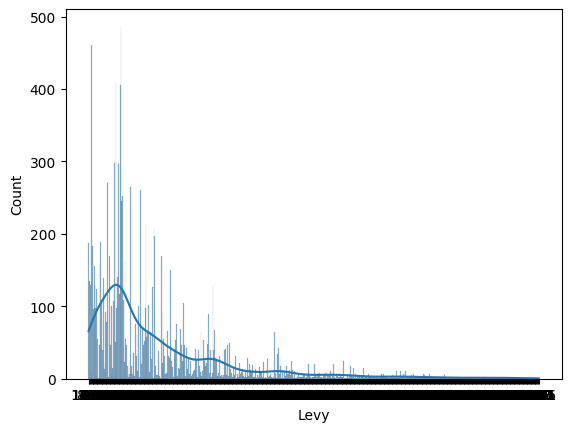

In [9]:
sns.histplot(df["Levy"],bins=50,kde=True)
plt.show()

In [10]:
from sklearn.impute import SimpleImputer
imputer=SimpleImputer(strategy='median')
df['Levy']=imputer.fit_transform(df[['Levy']])

In [11]:
df.duplicated().sum()

np.int64(313)

In [12]:
df.drop_duplicates(inplace=True)

In [13]:
df.drop(['ID'],axis=1,inplace=True)

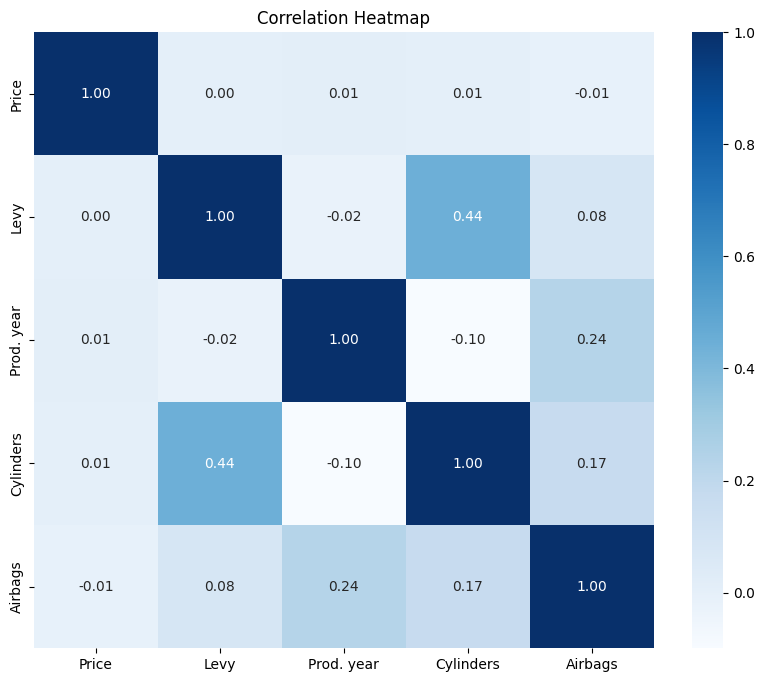

In [14]:
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(10,8))
sns.heatmap(df[numeric_cols].corr(), annot=True, fmt='.2f', cmap='Blues')
plt.title("Correlation Heatmap")
plt.show()


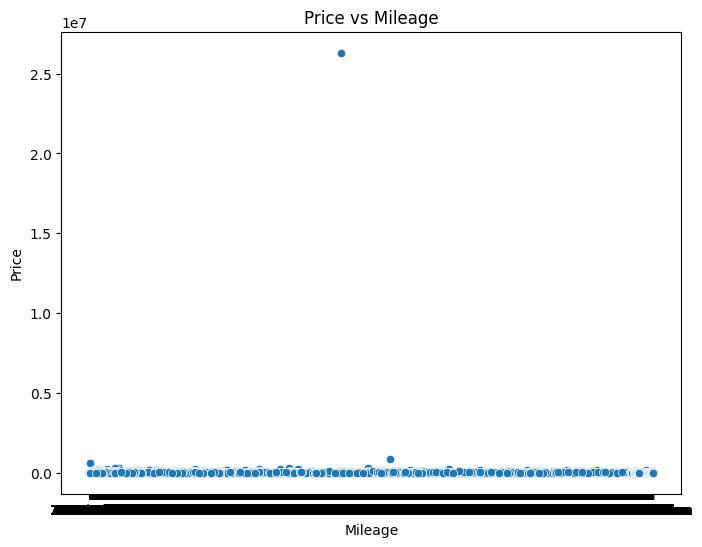

In [15]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Mileage', y='Price', data=df)
plt.title("Price vs Mileage")
plt.show()


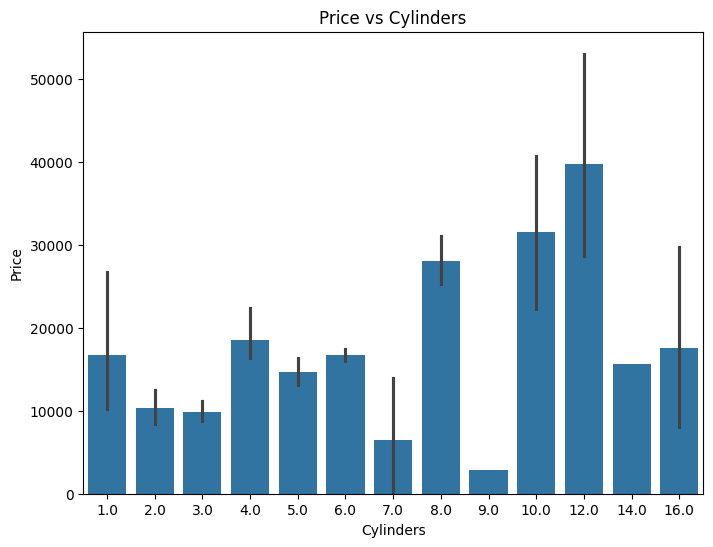

In [16]:
plt.figure(figsize=(8,6))
sns.barplot(x='Cylinders', y='Price', data=df)
plt.title("Price vs Cylinders")
plt.show()


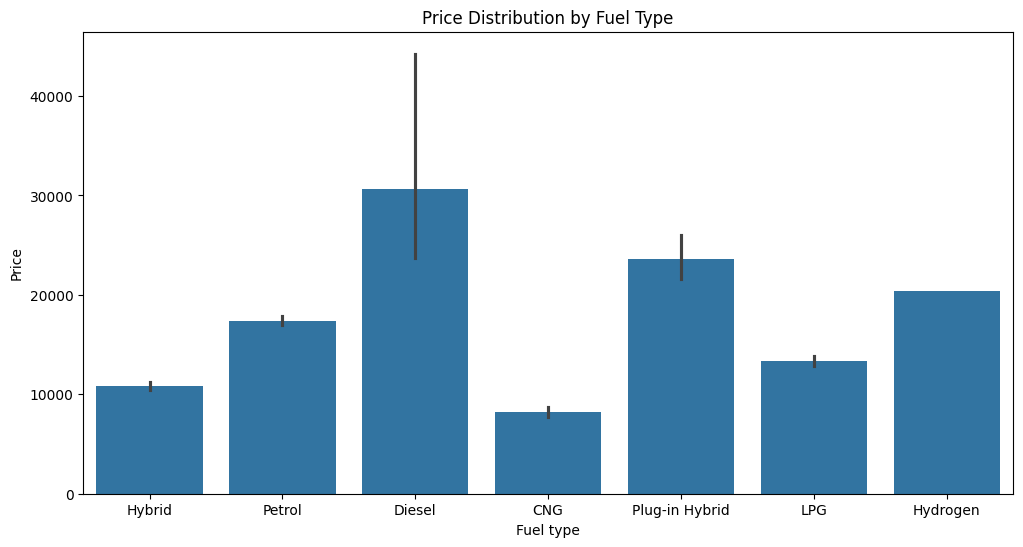

In [17]:
plt.figure(figsize=(12,6))
sns.barplot(x='Fuel type', y='Price', data=df)
plt.title("Price Distribution by Fuel Type")
plt.show()


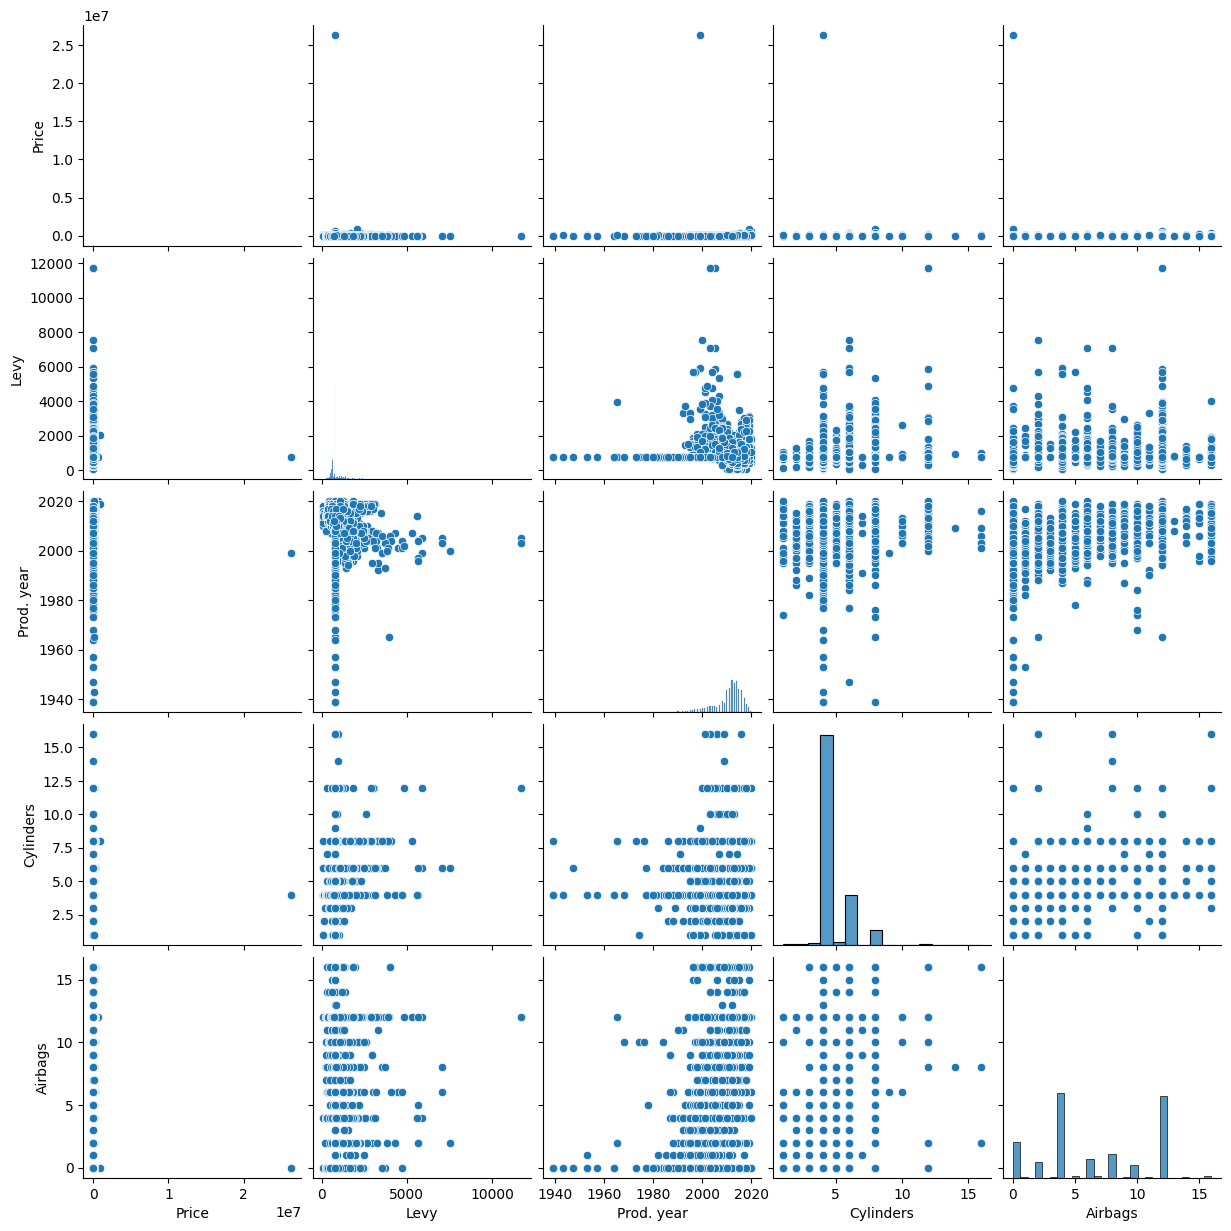

In [18]:
sns.pairplot(df)
plt.show()

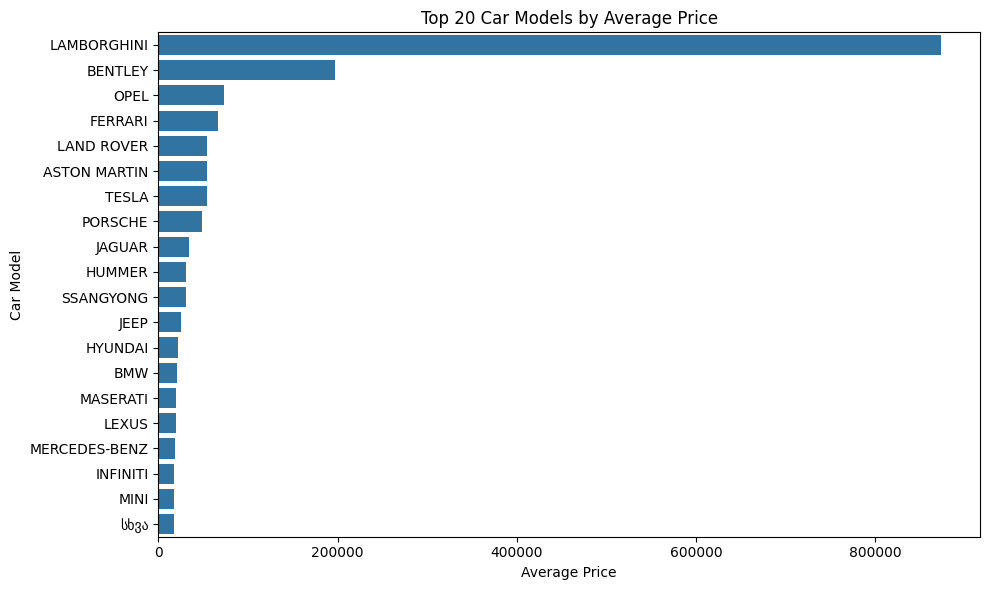

In [19]:
avg_prices_by_car = df.groupby('Manufacturer')['Price'].mean().sort_values(ascending=False)
n=20
top_car_models = avg_prices_by_car.head(n)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_car_models.values, y=top_car_models.index)
plt.title(f'Top {n} Car Models by Average Price')
plt.xlabel('Average Price')
plt.ylabel('Car Model')
plt.tight_layout()
plt.show()

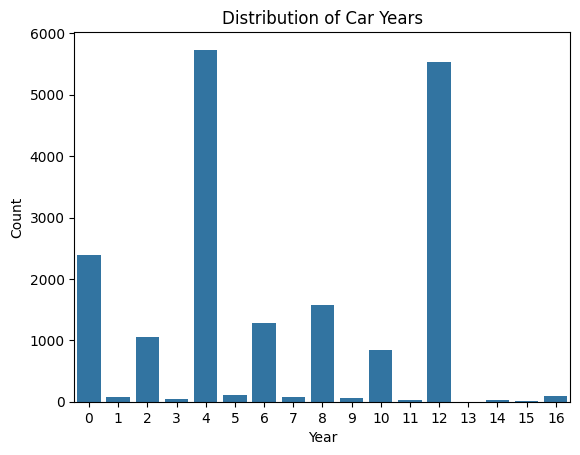

In [20]:
sns.countplot(x='Airbags', data=df)
plt.title("Distribution of Car Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()

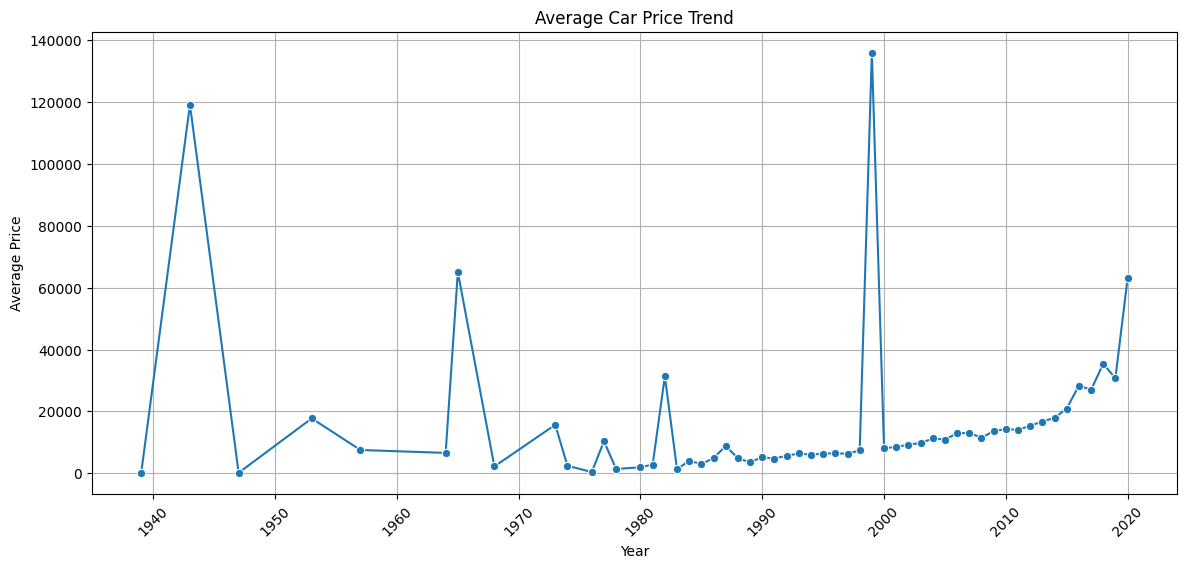

In [21]:
Price_mean = df.groupby('Prod. year')['Price'].mean()
plt.figure(figsize=(14,6))
sns.lineplot(x=Price_mean.index, y=Price_mean.values, marker='o')
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Average Price")
plt.title("Average Car Price Trend")
plt.grid(True)
plt.show()

In [22]:
df['Levy']=df['Levy'].astype(int)

In [23]:
df['Mileage']=df['Mileage'].str.replace('km','')
df['Mileage']=df['Mileage'].astype(int)

In [24]:
df['Engine volume']=df['Engine volume'].str.replace('Turbo','')
df['Engine volume']=df['Engine volume'].astype(float)

In [25]:
numeric_cols = df.select_dtypes(include=np.number).columns
for col in numeric_cols :
  df[col].quantile(0.25)
  df[col].quantile(0.75)
  Q1=df[col].quantile(0.25)
  Q3=df[col].quantile(0.75)
  IQR=Q3-Q1
  lower_bound=Q1-1.5*IQR
  upper_bound=Q3+1.5*IQR
  df[col]=np.where(df[col]>upper_bound,upper_bound,df[col])
  df[col]=np.where(df[col]<lower_bound,lower_bound,df[col])





In [26]:
df['Prod. year']=df['Prod. year'].astype(int)

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Manufacturer']=le.fit_transform(df['Manufacturer'])
df['Model']=le.fit_transform(df['Model'])
df['Category']=le.fit_transform(df['Category'])
df['Leather interior']=le.fit_transform(df['Leather interior'])
df['Fuel type']=le.fit_transform(df['Fuel type'])
df['Gear box type']=le.fit_transform(df['Gear box type'])
df['Drive wheels']=le.fit_transform(df['Drive wheels'])
df['Doors']=le.fit_transform(df['Doors'])
df['Wheel']=le.fit_transform(df['Wheel'])
df['Color']=le.fit_transform(df['Color'])


In [28]:
X=df.drop(['Price'],axis=1)
y=df['Price']

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(15139, 16)
(3785, 16)
(15139,)
(3785,)


In [30]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [31]:
from sklearn.linear_model import LinearRegression , Lasso ,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import HistGradientBoostingRegressor
import xgboost as xgb
from xgboost import XGBRegressor
import lightgbm as lgb
from lightgbm import LGBMRegressor

In [32]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,root_mean_squared_error,r2_score

In [33]:
models ={
    "Linear Regression":LinearRegression(),
    "Lasso":Lasso(),
    "Ridge":Ridge(),
    "KNN":KNeighborsRegressor(n_neighbors=5,metric='minkowski',p=1),
    # "SVM":SVR(kernel='linear', C=100, gamma=1),
    "Decision Tree":DecisionTreeRegressor(criterion='squared_error',max_depth=10),
    "Random Forest":RandomForestRegressor(n_estimators=50,criterion='squared_error',max_depth=10),
    "ExtraTrees": ExtraTreesRegressor(n_estimators=100, random_state=42),
    "Bagging": BaggingRegressor(estimator=DecisionTreeRegressor(criterion='squared_error',max_depth=10),n_estimators=50, random_state=42),
    "AdaBoost": AdaBoostRegressor(n_estimators=50, random_state=42),
    "GradientBoosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "HistGradientBoosting": HistGradientBoostingRegressor(max_iter=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42, verbosity=0),
    "LightGBM": LGBMRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
    }

In [34]:
errors=[]
for model_name , model in models.items():
    model.fit(X_train,y_train)
    MAE_Train = mean_absolute_error(y_train,model.predict(X_train))
    MAE_Test  =  mean_absolute_error(y_test,model.predict(X_test))

    MSE_Train = mean_squared_error(y_train,model.predict(X_train))
    MSE_Test  =  mean_squared_error(y_test,model.predict(X_test))

    RMSE_Train = root_mean_squared_error(y_train,model.predict(X_train))
    RMSE_Test  =  root_mean_squared_error(y_test,model.predict(X_test))

    R_Train = r2_score(y_train,model.predict(X_train))
    R_Test  =  r2_score(y_test,model.predict(X_test))

    errors.append([MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test])

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001923 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 837
[LightGBM] [Info] Number of data points in the train set: 15139, number of used features: 15
[LightGBM] [Info] Start training from score 15872.196975


In [35]:
pd.DataFrame(errors,columns=["MAE_Train","MSE_Train","RMSE_Train","R_Train","MAE_Test","MSE_Test","RMSE_Test","R_Test"],index=models.keys())

,MAE_Train,MSE_Train,RMSE_Train,R_Train,MAE_Test,MSE_Test,RMSE_Test,R_Test
Linear Regression,9036.417867,1.319351e+08,11486.298910,0.265762,9191.159610,1.351346e+08,11624.742598,0.256619
Lasso,9036.088907,1.319354e+08,11486.313401,0.265760,9190.739066,1.351287e+08,11624.488369,0.256652
Ridge,9036.149559,1.319352e+08,11486.304211,0.265761,9190.798179,1.351317e+08,11624.615460,0.256636
KNN,3572.790303,3.599044e+07,5999.203220,0.799708,4496.726129,5.525906e+07,7433.643569,0.696018
Decision Tree,4092.521899,3.942578e+07,6278.995262,0.780590,5241.546437,6.819400e+07,8257.966140,0.624862
Random Forest,4006.192087,3.389458e+07,5821.905238,0.811372,4754.694722,5.015047e+07,7081.699995,0.724120
ExtraTrees,194.174342,2.433487e+06,1559.963714,0.986457,3546.949466,4.037609e+07,6354.217974,0.777890
Bagging,3990.005663,3.372078e+07,5806.959509,0.812339,4732.001326,4.958823e+07,7041.891205,0.727213
AdaBoost,8708.607483,1.134052e+08,10649.188323,0.368883,8781.012436,1.156457e+08,10753.866782,0.363829
GradientBoosting,5822.487310,6.611616e+07,8131.184330,0.632054,6015.997604,7.085338e+07,8417.444755,0.610233
